### Create one realisation of timeseries from given absolute values of an FFT when the initial timeseries is NOT known


To create a timeseries from the absolute values of an FFT we apply an inverse Fourier transform.

However, the absoulte values of the FFT don't have any information about its phase. Since we don't have phase information, the original timesereis is not recoverable. We can however, create random phase in the frequency domain and then multiply it with the absolute value of the FFT.


**The process that is followed is the following:**
1) Create a signal in the time domain, $signal$

2) Move to frequency domain, by applying FFT

3) Compute the amplitude of the FFT, $r$

4) Create random phase in the frequency domain uniformly distributed from 0 to 2π and multiply it with the absolute values of the FFT

5) Reconstruct the FFT by the amplitude and the phase information, $fft_2$

5) Recover the original signal by applying inverse fourier transform, $signal _reconstructed$

In [190]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Create signal in time domain

In [239]:
T = 0.5 # s
N = 10000 # 
f = 10 # Hz

In [240]:
t = np.linspace(0, T, N)
Dt = t[1]-t[0] # Delta t

In [241]:
signal = np.sin(2*np.pi*f*t)#+np.sin(2*np.pi*2*f*t)

Text(0, 0.5, 'Amplitude (a.u.)')

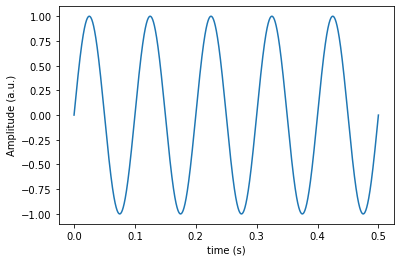

In [242]:
plt.plot(t, signal)
plt.xlabel('time (s)')
plt.ylabel('Amplitude (a.u.)')

### 2. FFT --> Frequency domain

In [243]:
fft = np.fft.fft(signal)
freq = np.fft.fftfreq(N, Dt)
print(freq[1]-freq[0])

1.9997999999999998


Text(0, 0.5, 'Amplitude (a.u.)')

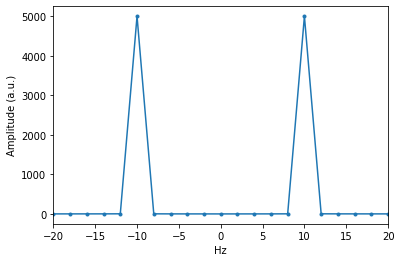

In [244]:
plt.plot(np.fft.fftshift(freq), np.fft.fftshift(np.abs(fft)), '.-')
plt.xlim(-20, 20)
plt.xlabel('Hz')
plt.ylabel('Amplitude (a.u.)')

In [245]:
fft[5]

(7.853582454648805-4999.741762421805j)

In [246]:
fft[-5]

(7.853582454648805+4999.741762421805j)

### 3. Compute the amplitude of the FFT, $r$, and the phase, $theta$

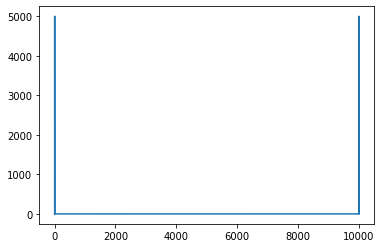

In [247]:
r = np.sqrt(np.real(fft)**2+np.imag(fft)**2) # = np.abs(fft)
plt.plot(r)

### 4. Create random phase in the frequency domain uniformly distributed between 0 and 2pi

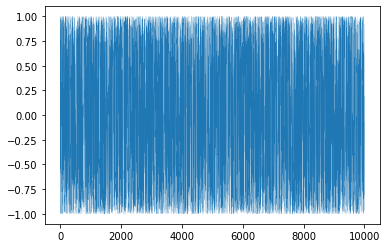

In [248]:
phi = np.exp(1j*2*np.pi*np.random.uniform(0,1, len(freq)))
phi[0]=0
#reverse_phi = np.conj(phi)
#phi = np.array(list(phi)+list(reverse_phi))
plt.plot(phi, lw=0.1)

In [249]:
phi[5]=np.conj(phi[-5])


In [250]:
np.abs(phi)

array([0., 1., 1., ..., 1., 1., 1.])

### 4. Reconstruct the FFT by the amplitude and the phase information

In [251]:
fft_2 = r*phi

### 5. Recover the original signal by applying inverse fourier transform

In [252]:
signal_reconstructed = np.fft.ifft(fft_2)

In [253]:
signal_reconstructed

array([0.92152076+1.52841712e-05j, 0.92029068-2.70343846e-05j,
       0.91906751-1.69543414e-05j, ..., 0.92517147-4.17557716e-05j,
       0.92397503-3.49842076e-05j, 0.92275501-2.11384188e-05j])

### 6. Compare the orginal signal with the recovered one

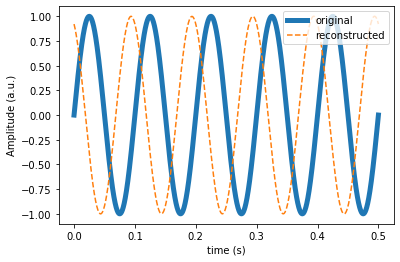

In [254]:
plt.plot(t, signal, linewidth = 5, label = 'original')
plt.plot(t, np.real(signal_reconstructed), linestyle='--', label='reconstructed')
#plt.plot(t, np.imag(signal_reconstructed), linestyle='--', label='reconstructed')
#plt.plot(t, np.abs(signal_reconstructed), linestyle='--', label='reconstructed')
plt.xlabel('time (s)')
plt.ylabel('Amplitude (a.u.)')
plt.legend(loc=1)